# **This is the starting point of your final face recognition model.  You will need to fill in all of the missing boxes with correct code and sawer all of the conceptual questions.  You are also required to write correct and descriptive comments in each block.  For advanced, write correct and descriptive comments on each line of code.  Once you are approved (all code is working) you can move to Phase 2 of your project. Your model needs to reach a 80% accuracy on your testing data for your final project.**

In [2]:
from tensorflow import keras # imports keras from the library tensorflow
from tensorflow.keras import layers # imports layers from the library tensorflow.keras
from tensorflow.keras.datasets import imdb # imports imdb from the library tensorflow.keras.datasets
import numpy as np # imports numpy and names it np
import os, shutil, pathlib # imports os, shutil, and pathlib
from tensorflow.keras.utils import load_img # imports load_imag from the library tensorflow.keras.utils
from tensorflow.keras.utils import img_to_array # imports img_to_arry from the library tensorflow.keras.utils
from tensorflow.keras.utils import array_to_img # imports array_to_img from the library tensorflow.keras.utils
import matplotlib.pyplot as plt # imports mathplotlib.pyplot and names it as plt
import tensorflow as tf # imports tensorflow and names it is tf
from PIL import Image # imports Image from PIL


# Path to use to save models
OUTPUT_MODEL_BASE = "/content/gdrive/My Drive/AI-Institute_Drew Collaboration/2025model/"
OUTPUT_MODEL_NAME='regie_ingram_2025'
# You need to know the version of tensorflow if you want to re-import the model on another computer
# to make sure you pull in the right version of tensorflow
# This notebook originally used 2.15.0 on April 22, 2024
# version 2.18.0 on May 15, 2025
print("Tensorflow Version: " + tf.__version__)



Tensorflow Version: 2.18.0


In [3]:
def show_image(im): #this function will show the image that you input
  plt.imshow(im,cmap=plt.cm.summer) # it takes the image with a cmap of summer
  plt.show() # it prints the image

In [4]:
def show_image_vpp(im,value,prediction,probability): #it shows the image and prints the predition with the probability
  plt.imshow(im,cmap=plt.cm.summer) # this takes the image with a cmap of summer
  plt.show() # this shows the image
  print("the value is ",student_names[value]) # this prints the student's name
  print("The predicted value is ",student_names[prediction]," with probability: ",probability) # this shows the prediction and the probability that the prediction is correct.

Keep this as is for now. Once you get everything running, you will come back to this and build out the layers using what you know.

In [5]:
def build_model(input_shape): #this will build the prediction model with the neurons and output
    input = keras.Input(shape=(input_shape,),name="data") # This is the input of the image
    l1 = layers.Dense(512,activation="relu")(input) # This is the first layer of neurons that the images go through
    l2 = layers.Dense(256,activation="relu")(l1) # This is the second layer of neurons that the images go through
    l3 = layers.Dense(128,activation="relu")(l2) # This is the third layer of neurons that the images go through
    #l4 = layers.Dense(64,activation="relu")(l3) # This is the fourth layer of neurons that the images go through
    #l5 = layers.Dense(32,activation="relu")(l4) # This is the fifth layer of neurons that the images go through
    output = layers.Dense(31,activation="softmax")(l3) # this is the output layer that is the prediction
    model = keras.Model(inputs=input,outputs=output) # This creates the model by putting the inputs and outputs
    return model # this returns the model

1) Explain what the 31 means in the output layer.  

Answer:  There are 31 outputs

Note that the number of epochs below is 1.  Don't change it for now, but after you get everything else working, you will need to come back and address this to improve your model's accuracy.  

In [6]:
def train_model(model,train_tensors,train_labels): # this trains the model
    model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"]) # this compiles the information
    model.fit(train_tensors,train_labels,epochs=40) # this sets the number of epochs

2) How do you know if you need more or less epochs?  

Answer: You know if you need more epochs if the accuracy isn't high enough
You know if you need less because when you are adding more of them, the accuracy isn't significantlly getting better.

In [7]:
def predict(model,test_tensors): # this is a prediction and probability if it is correct.
    mpredictions = model.predict(test_tensors) # This predicts teh model from the tensors
    digit_predictions = np.array([x.argmax() for x in mpredictions]) # This makes the prediction as a number
    digit_probability = np.array([mpredictions[i][p] for i, p in enumerate(digit_predictions)]) # this makes a probability as a decimal
    return digit_predictions,digit_probability # this returns the prediction and probabilities

# Get the training and testing data.  Use this video if you are absent when I go over this in class.  

This is new code and it is not expected that you understand this, but you need to add a shortcut to this folder on your google drive.  Once you have your shortcut, replace the below path after "My Drive/" with your path. I will walk you through this step in class. Once you have done that, run this code to confirm you are accessing the class image files.  If you are not here when we do this part, you can watch this video of how to do it here: https://www.loom.com/share/4316be2eaac34ddfa1fcfed7d7bbbbcf?sid=725db59f-5ceb-43b4-bb14-5c37dd947108
  

Folder link: https://drive.google.com/drive/folders/1-8UNC2YyagZ6cr6nq2USM8ih6wGUOTh8?usp=sharing


In [8]:
from google.colab import drive # this imports a file from google colab
drive.mount('/content/gdrive') #gives access to the drive
#!ls "/content/gdrive/My Drive/ML_Image_Data/MLImages-backup-240416-140003"
!ls "/content/gdrive/My Drive/EngineeringConcepts2025" #List all of the items in this folder
plt.figure(figsize=(10,10)) # this sets the size to 10 by 10
size_picture = 100 # the size of the picture is 100

Mounted at /content/gdrive
 Anaysa_Glover	   Eric_Ayers	    Krista_Fongeh       Regie_Ingram
 Ariana_Harris	   Ethan_Edwards    Landon_Calbert      Tameka_Allen
 Armon_Anderson    Grant_Packwood  "Marielle_O'Neill"   Thihini_Nagendran
 Avery_Roberson    Jack_Crippen    "Mayci_O'Neill"      Timothy_Whitaker
 Beth_White	   Jack_Lovell	    Michael_Rashad      Titus_Smith
 Cameron_Green	   Jai_Bazawule     Panselle_Range      Zamyaih_Williams
 Courtney_Bryant   Jordyn_Hanes     Penny_Dunn
 Dustin_Mills	   Kendrick_Myers   Peter_McKnight


<Figure size 1000x1000 with 0 Axes>

In [9]:
#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

3) In the digit recognition model, what did this (above) block of code do?  Break down your answer into all four parts.

Answer: The code took the information from the google drive, then listed every item in the folder, then made the size of them 10x10, and finally, made the size picture to 100 pixels.

Run the below functions.

In [10]:
def tensor_from_image(filename): # this defines a function named tensor_from_image
    img = load_img(filename,color_mode = 'grayscale') # this loads an image at a grayscale
    img = img.resize((size_picture,size_picture)) # This resizes the image to a square
    return img_to_array(img).reshape((size_picture,size_picture)) # this returns the image as an array and reshapes it to the size_picture

In [11]:
def load_dataset(): # defines a function called load_dataset
    train_images = [] # Creates an empty array called train_images
    train_labels = [] # Creates an empty array called train_labels
    test_images = [] # Creates an empty array called test_images
    test_labels = [] # Creates an empty array called test_labels
    base_directory = pathlib.Path('/content/gdrive/My Drive/EngineeringConcepts2025') # calls the info from the drive
    student_names = os.listdir(base_directory) # makes student_names from the base_directory
    k = 0 # creates variable with the value of 0
    n = 0 # creates variable with the value of 0
    names = [] # Creates an empty array called names
    for i, s in enumerate(student_names): # for loop for the length of student_names
        print(i,s) # prints i and s
        if s!=".DS_Store": # if s is not ".DS_Store", run the code below
            names.append(s) # appends s
            student_directory = base_directory / s # divides the base_directory by s
            image_names = os.listdir(student_directory) # takes the student_directory
            for i in image_names: # loops for every value in image_names
                fname = student_directory / i # divides student_directory by i
                t = tensor_from_image(fname) / 255
                '''
                if n is divisible by 9, append t and k to test_images/test_labels
                if it isn't divisible by 9, append t and k to train_images/train_labels
                '''
                if n % 9 == 0:
                    test_images.append(t)
                    test_labels.append(k)
                else:
                    train_images.append(t)
                    train_labels.append(k)
                n += 1 # adds 1 to n
            k += 1 # adds 1 to k
    return (k,
            (np.array(train_images),np.array(train_labels)),
            (np.array(test_images),np.array(test_labels)),
            names
           )
    # returns k, the array of train_images, train_labels, test_images, test)labels, and names

Run this code to load your data.  

In [12]:
(nb_students,(train_images,train_labels),(test_images,test_labels),student_names) = load_dataset() # loads the dataset


0 Jack_Lovell
1 Ariana_Harris
2 Grant_Packwood
3 Marielle_O'Neill
4 Beth_White
5 Timothy_Whitaker
6 Jack_Crippen
7 Anaysa_Glover
8 Mayci_O'Neill
9 Landon_Calbert
10 Penny_Dunn
11 Eric_Ayers
12 Michael_Rashad
13 Jordyn_Hanes
14 Regie_Ingram
15 Panselle_Range
16 Krista_Fongeh
17 Thihini_Nagendran
18 Titus_Smith
19 Cameron_Green
20 Jai_Bazawule
21 Ethan_Edwards
22 Armon_Anderson
23 Zamyaih_Williams
24 Avery_Roberson
25 Courtney_Bryant
26 Peter_McKnight
27 Kendrick_Myers
28 Dustin_Mills
29 Tameka_Allen


Print out each of the six items in the loaded data to get an idea of or refresh yourself on what they are.

4) Print nb_students.  

In [13]:
nb_students

30

4a) What does this number represent?

Answer: This is how many students there are in the file.

5) Print train_images.  

In [14]:
train_images

array([[[0.63529414, 0.6745098 , 0.70980394, ..., 0.5294118 ,
         0.53333336, 0.53333336],
        [0.6784314 , 0.7176471 , 0.7529412 , ..., 0.53333336,
         0.53333336, 0.5372549 ],
        [0.73333335, 0.76862746, 0.8       , ..., 0.5372549 ,
         0.5411765 , 0.54509807],
        ...,
        [0.03921569, 0.03529412, 0.03921569, ..., 0.4117647 ,
         0.3647059 , 0.23921569],
        [0.03529412, 0.03529412, 0.03529412, ..., 0.41568628,
         0.36862746, 0.26666668],
        [0.03529412, 0.03921569, 0.03529412, ..., 0.41960785,
         0.38039216, 0.29803923]],

       [[0.7529412 , 0.79607844, 0.8352941 , ..., 0.6156863 ,
         0.6156863 , 0.61960787],
        [0.79607844, 0.8352941 , 0.8666667 , ..., 0.6156863 ,
         0.61960787, 0.61960787],
        [0.8392157 , 0.8745098 , 0.9019608 , ..., 0.6156863 ,
         0.61960787, 0.61960787],
        ...,
        [0.04705882, 0.04313726, 0.04313726, ..., 0.4392157 ,
         0.42745098, 0.36078432],
        [0.0

5a) What is train_images?  

Answer: They are all of the images with an order value that isn't divisible by 9


6) Print train_labels.

In [15]:
train_labels

array([ 0,  0,  0, ..., 29, 29, 29])

6a) What do these numerical values represent?  

Answer: They are the index to the images to a value of 0-30 which are the student's names

7) Print test_images.  

In [16]:
test_images # prints test_image as a matrix

array([[[0.627451  , 0.6666667 , 0.7058824 , ..., 0.5137255 ,
         0.5176471 , 0.5254902 ],
        [0.6666667 , 0.69803923, 0.7294118 , ..., 0.5176471 ,
         0.52156866, 0.5254902 ],
        [0.70980394, 0.7411765 , 0.76862746, ..., 0.52156866,
         0.5254902 , 0.5294118 ],
        ...,
        [0.21176471, 0.15686275, 0.09803922, ..., 0.37254903,
         0.30588236, 0.24313726],
        [0.4627451 , 0.13725491, 0.09019608, ..., 0.3764706 ,
         0.29803923, 0.25882354],
        [0.5058824 , 0.1254902 , 0.13725491, ..., 0.37254903,
         0.30980393, 0.2901961 ]],

       [[0.627451  , 0.6666667 , 0.7058824 , ..., 0.5176471 ,
         0.5176471 , 0.52156866],
        [0.6666667 , 0.69803923, 0.7294118 , ..., 0.5176471 ,
         0.52156866, 0.5254902 ],
        [0.70980394, 0.7411765 , 0.76862746, ..., 0.52156866,
         0.5254902 , 0.5294118 ],
        ...,
        [0.21176471, 0.15686275, 0.09803922, ..., 0.52156866,
         0.4509804 , 0.39607844],
        [0.4

8) Print test_labels.

In [17]:
test_labels # prints the labels of the student names

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9

9) Print student_names.

In [18]:
student_names # Prints the students' names

['Jack_Lovell',
 'Ariana_Harris',
 'Grant_Packwood',
 "Marielle_O'Neill",
 'Beth_White',
 'Timothy_Whitaker',
 'Jack_Crippen',
 'Anaysa_Glover',
 "Mayci_O'Neill",
 'Landon_Calbert',
 'Penny_Dunn',
 'Eric_Ayers',
 'Michael_Rashad',
 'Jordyn_Hanes',
 'Regie_Ingram',
 'Panselle_Range',
 'Krista_Fongeh',
 'Thihini_Nagendran',
 'Titus_Smith',
 'Cameron_Green',
 'Jai_Bazawule',
 'Ethan_Edwards',
 'Armon_Anderson',
 'Zamyaih_Williams',
 'Avery_Roberson',
 'Courtney_Bryant',
 'Peter_McKnight',
 'Kendrick_Myers',
 'Dustin_Mills',
 'Tameka_Allen']

10) Assign the shape of train_images to train_shape. Print train_shape.

In [19]:
train_shape = train_images.shape # makes train_shape as the shape of train_images
train_shape # prints train_shape

(4053, 100, 100)

11) Print out the first image train_images in matrix format.



In [20]:
train_images[0] # prints the first image of train_images as a matrix

array([[0.63529414, 0.6745098 , 0.70980394, ..., 0.5294118 , 0.53333336,
        0.53333336],
       [0.6784314 , 0.7176471 , 0.7529412 , ..., 0.53333336, 0.53333336,
        0.5372549 ],
       [0.73333335, 0.76862746, 0.8       , ..., 0.5372549 , 0.5411765 ,
        0.54509807],
       ...,
       [0.03921569, 0.03529412, 0.03921569, ..., 0.4117647 , 0.3647059 ,
        0.23921569],
       [0.03529412, 0.03529412, 0.03529412, ..., 0.41568628, 0.36862746,
        0.26666668],
       [0.03529412, 0.03921569, 0.03529412, ..., 0.41960785, 0.38039216,
        0.29803923]], dtype=float32)

12) Print out the first image in train images in image format.

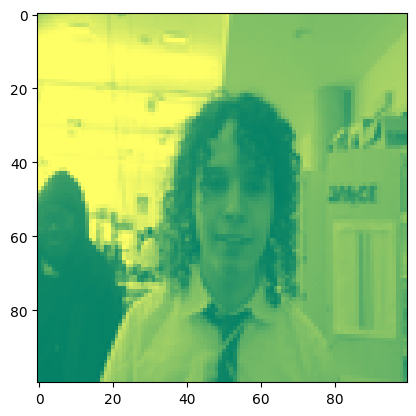

In [21]:
show_image(train_images[0])

13) Print out the label for this image.

In [22]:
train_labels[0]

np.int64(0)

Print out the name associated with this label.

In [23]:
student_names[0]

'Jack_Lovell'

14) Print out the second name in student_names.

In [24]:
student_names[1]

'Ariana_Harris'

15) Write a for loop to print out all of the names in the list student_names and their indices (indexes).  

In [25]:
for i in range(len(student_names)):
  print(str(i),student_names[i])

0 Jack_Lovell
1 Ariana_Harris
2 Grant_Packwood
3 Marielle_O'Neill
4 Beth_White
5 Timothy_Whitaker
6 Jack_Crippen
7 Anaysa_Glover
8 Mayci_O'Neill
9 Landon_Calbert
10 Penny_Dunn
11 Eric_Ayers
12 Michael_Rashad
13 Jordyn_Hanes
14 Regie_Ingram
15 Panselle_Range
16 Krista_Fongeh
17 Thihini_Nagendran
18 Titus_Smith
19 Cameron_Green
20 Jai_Bazawule
21 Ethan_Edwards
22 Armon_Anderson
23 Zamyaih_Williams
24 Avery_Roberson
25 Courtney_Bryant
26 Peter_McKnight
27 Kendrick_Myers
28 Dustin_Mills
29 Tameka_Allen


16) Reshape your train_images "from a box into a line" and assign them to train_tensors.  Print out train_tensors.shape to confirm that they have been put into a line.  

In [26]:
train_tensors = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2])) # changes the shape of train_images
train_tensors.shape

(4053, 10000)

17) Call the build model function with the correct parameter (the second value in train_tensors.shape). Make sure you name the output "model."

In [27]:
model = build_model(train_tensors.shape[1])

18) Print out the model summary using the summary method.

In [28]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data (InputLayer)               │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,288,735 (20.17 MB)

 Trainable params: 5,288,735 (20.17 MB)

 Non-trainable params: 0 (0.00 B)

19) Call the train model function with the appropraite parameters. Remember all functions are defined above if you need a reference.

In [29]:
train_model(model,train_tensors,train_labels)

Epoch 1/40
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1461 - loss: 4.9199
Epoch 2/40
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4265 - loss: 1.9754
Epoch 3/40
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5401 - loss: 1.5997
Epoch 4/40
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5681 - loss: 1.4370
Epoch 5/40
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6249 - loss: 1.2295
Epoch 6/40
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6563 - loss: 1.1300
Epoch 7/40
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6750 - loss: 1.0427
Epoch 8/40
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7326 - loss: 0.8938
Epoch 9/40
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7572 - loss: 0.7846
Epoch 10/40
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7944 - loss: 0.6515
Epoch 11/40
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7992 - loss: 0.6011
Epoch 12/40
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

In [30]:
import json
with open(os.path.join(OUTPUT_MODEL_BASE, "%s_labels.json") % (OUTPUT_MODEL_NAME), 'w') as f:
  f.write(json.dumps(student_names))


# Convert model to TFLite format and save
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


with open(os.path.join(OUTPUT_MODEL_BASE, '%s.tflite' % (OUTPUT_MODEL_NAME)), 'wb') as f:
  f.write(tflite_model)


Saved artifact at '/tmp/tmpyjnb6kva'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10000), dtype=tf.float32, name='data')
Output Type:
  TensorSpec(shape=(None, 31), dtype=tf.float32, name=None)
Captures:
  132874542101712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132875453637520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132874537706960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132874537705808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132874539531536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132874537706768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132874539528464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132874539528080: TensorSpec(shape=(), dtype=tf.resource, name=None)


20) What is an epoch?

Answer: It is a complete pass through a model.

21) The model is trained; it is time to see how well it does at recognizing your faces!!  To do this you need to reshape the testing dataset and assign it to test_shape.


In [ ]:
test_shape = test_images.shape
test_shape

(507, 100, 100)

22) Reshape your test_images "from a box to a line" and assign them to test_tensors.

In [ ]:
test_tensors = test_images.reshape((test_images.shape[0], test_images.shape[1] * test_images.shape[2]))



23) Print your 20th test image in matrix format.

In [ ]:
test_images[19]

array([[0.7647059 , 0.7529412 , 0.78039217, ..., 0.5803922 , 0.58431375,
        0.5921569 ],
       [0.76862746, 0.7529412 , 0.7607843 , ..., 0.58431375, 0.5882353 ,
        0.5921569 ],
       [0.77254903, 0.77254903, 0.76862746, ..., 0.5882353 , 0.5921569 ,
        0.59607846],
       ...,
       [0.08627451, 0.07058824, 0.07843138, ..., 0.4       , 0.50980395,
        0.6627451 ],
       [0.09019608, 0.06666667, 0.07450981, ..., 0.3764706 , 0.4745098 ,
        0.6509804 ],
       [0.09019608, 0.06666667, 0.07843138, ..., 0.39607844, 0.41568628,
        0.5411765 ]], dtype=float32)

24) Print your 20th test image in image format.

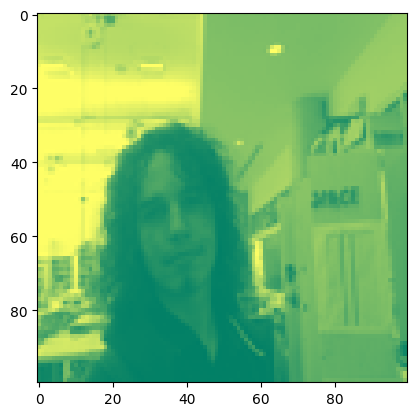

In [ ]:
show_image(test_images[19])

25) Print the label that represents this image (numerical value).  

In [ ]:
test_labels[19]

np.int64(0)

26) Print the corresponding students' name that is represented by this image.

In [ ]:
student_names[test_labels[19]]

'Jack_Lovell'

Now we can make predictions and get probabilities.  I will be checking this block to make sure that everything above it has run. Do not edit this block of code at all.

In [ ]:
pred, prob = predict(model,test_tensors)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
pred

array([ 0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2, 20,  2,  2,  2,  2,  2,  2,  2,  2, 10,  3,  3,  4,
        3,  3, 16, 21,  3,  3,  3,  3, 15,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
       19,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 12,
        6,  6,  2,  6,  6,  6,  6,  6,  6,  6,  7,  7, 15,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  8, 17,  8,  8,  8,  9, 15,  9,  9,  9,  9,
        9,  9,  9,  9,  9

27) Describe what these numerical values mean.

Answer: They are the predictions of what index a lable is

In [ ]:
prob

array([0.99998146, 0.9999978 , 0.99999946, 0.9999991 , 0.99910146,
       0.99999994, 0.9999998 , 0.99999994, 0.99999994, 0.99999994,
       0.9980815 , 0.99999994, 0.999994  , 0.99999994, 0.9999941 ,
       0.9999998 , 0.99999994, 0.9999997 , 0.9999996 , 0.9997494 ,
       0.99999994, 0.99999994, 0.9999972 , 0.99999994, 0.99999994,
       0.999999  , 0.99999994, 0.99999994, 0.99999994, 0.9999816 ,
       0.99993604, 0.99998504, 0.9999998 , 0.99957293, 0.99950284,
       0.941049  , 0.9999983 , 0.9998131 , 0.9623618 , 0.99999994,
       0.99998945, 0.9998793 , 0.9935104 , 0.99987483, 0.99999994,
       0.9999978 , 0.99999994, 0.9999991 , 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99992007, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.9999803 , 0.99999994,
       0.99999994, 0.99999994, 0.99975383, 0.99999994, 0.99999

28) Describe what these numerical values mean.

Answer:  This is the probability that the labels are assigned are correct

29) Print the 30th image in the test image dataset, its label and prediction and probability.

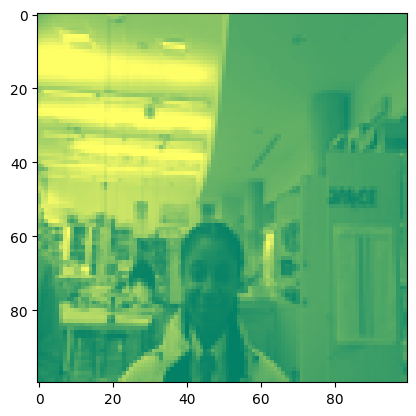

the value is  Ariana_Harris
The predicted value is  Ariana_Harris  with probability:  0.9999816


In [ ]:
show_image_vpp(test_images[29],test_labels[29],pred[29],prob[29])

30) Plot the 3rd image in the test_images dataset, its label, prediction, and probability.  

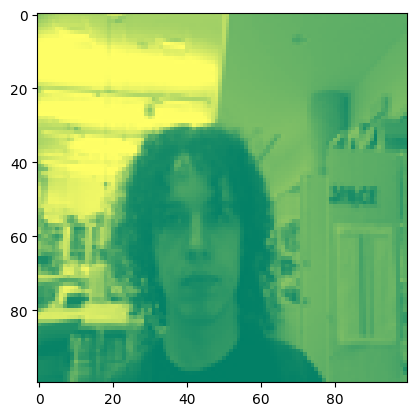

the value is  Jack_Lovell
The predicted value is  Jack_Lovell  with probability:  0.99999946


In [ ]:
show_image_vpp(train_images[2], train_labels[2], pred[2], prob[2])

Compute the number of wrong predictions. If everything above is running correctly this code block should run. Do not change it.  

In [ ]:
wrong_predictions_count = 0
for i in range(test_images.shape[0]):
    if test_labels[i] != pred[i]:
      wrong_predictions_count= wrong_predictions_count + 1
wrong_predictions_count

38

31) Explain which two items are being compared in your own words to get the "wrong_predictions."

Answer: It is comparing the test labels which are the names associated with the iamge to the prediction of what the model thinks the label for an image is.

Determine the number of wrong predictions in the test dataset.  If everything above is running correctly this code block should run. Do not change it.

In [ ]:
wrong_predictions_count = 0
for i in range(test_images.shape[0]):
    if test_labels[i] != pred[i]:
      wrong_predictions_count= wrong_predictions_count + 1
wrong_predictions_count

38

Calculate the accuracy on the test_images.  If everything above is running correctly this code block should run. Do not change it.

In [ ]:
accuracy = 1-(wrong_predictions_count/len(test_labels))
accuracy

0.9250493096646943

32) Determine the number of wrong predictions in the training dataset.  


In [ ]:
wrong_predictions_count_training = 0
for i in range(test_images.shape[0]):
    if train_labels[i] != pred[i]:
      wrong_predictions_count_training= wrong_predictions_count_training + 1
wrong_predictions_count_training

479

33) Calculate the accuracy on the training_images.  

In [ ]:
accuracy_training = 1-(wrong_predictions_count_training/len(train_labels))
accuracy_training

0.8818159388107575

34) Describe why the accuracy of the training images is higher than that of the testing images.  

Answer: The accuracy is higher because there is a higher number of images which gives the model more to train from.


35) Display the first 10 faces in the training dataset, their predictions and probabilities.


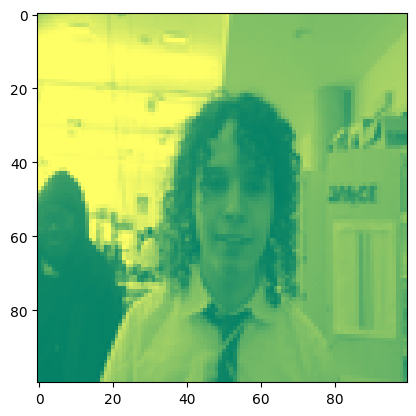

the value is  Jack_Lovell
The predicted value is  Jack_Lovell  with probability:  0.99998146


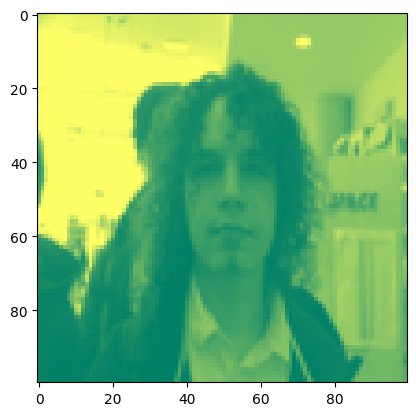

the value is  Jack_Lovell
The predicted value is  Jack_Lovell  with probability:  0.9999978


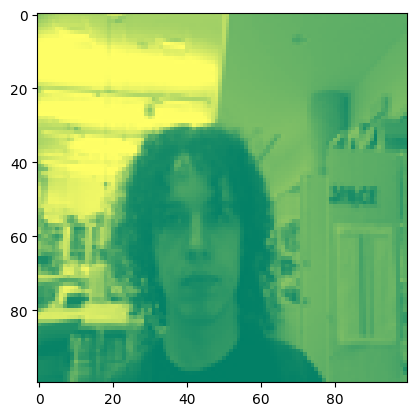

the value is  Jack_Lovell
The predicted value is  Jack_Lovell  with probability:  0.99999946


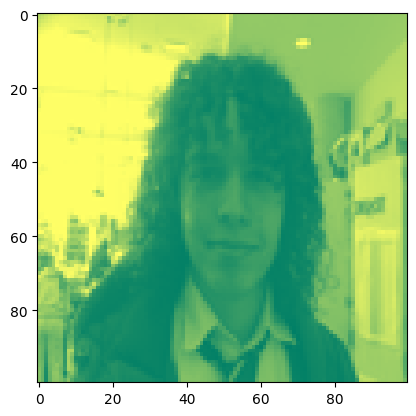

the value is  Jack_Lovell
The predicted value is  Jack_Lovell  with probability:  0.9999991


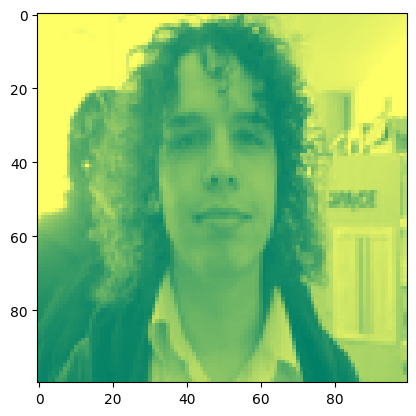

the value is  Jack_Lovell
The predicted value is  Ethan_Edwards  with probability:  0.99910146


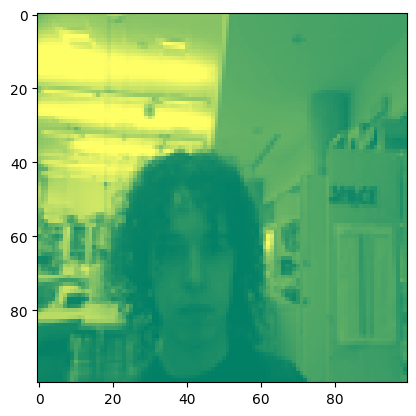

the value is  Jack_Lovell
The predicted value is  Jack_Lovell  with probability:  0.99999994


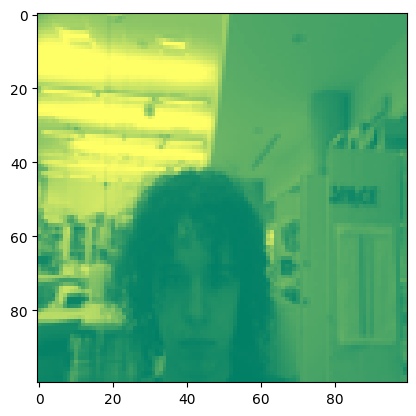

the value is  Jack_Lovell
The predicted value is  Jack_Lovell  with probability:  0.9999998


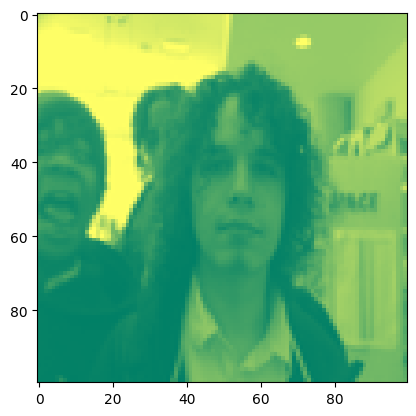

the value is  Jack_Lovell
The predicted value is  Jack_Lovell  with probability:  0.99999994


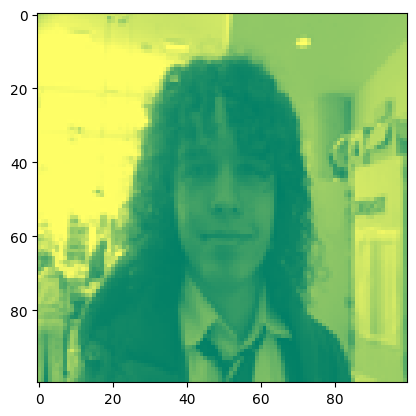

the value is  Jack_Lovell
The predicted value is  Jack_Lovell  with probability:  0.99999994


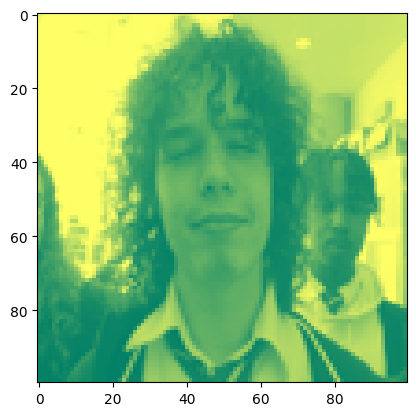

the value is  Jack_Lovell
The predicted value is  Jack_Lovell  with probability:  0.99999994


In [ ]:
for i in range(10):
  show_image_vpp(train_images[i], train_labels[i], pred[i], prob[i])



Evaluate the accuracy of the test set using model.evaluate.  Do not change this code.


In [ ]:
model.evaluate(train_tensors, train_labels)

127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9942 - loss: 0.0184


[0.028819838538765907, 0.9911177158355713]

Evaluate the accuracy of the test set using model.evaluate.  Do not change this code.

In [ ]:
model.evaluate(test_tensors, test_labels)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9449 - loss: 0.6446


[0.8015369772911072, 0.9250493049621582]

Once you get this entire model working (don't worry about the accuracy yet), call me over to grade it.  Once you get it working it will be time to manipulate the building model function and training model function for accuracy.  